# IV. Visualización de datos en Matplotlib

## Introducción al Matplotlib

A continuación, se muestran algunos dejemplos de sintaxis básica para trabajar con **Matplotlib**.

En la página de **matplotlib** hay una pestaña de tutoriales para introducirnos al paquete de gráficos. Se recomienda el paquete: **Sample plots in Matplotlib**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n = 10**5
df = pd.read_csv(r"C:\COVID_pruebas\base_datos_2008.csv", nrows=n)

In [19]:
data = np.unique( df.Cancelled, return_counts=True )
#Esta es una tabla que devuelve los vuelos cancelados

data
#Esto retorna 2 cosas:
# [0] los casos que tenemos(0,1).   0:= No Cancelados; 1:= Sí cancelados
# [1] Cuántos casos para cada asignación, cuántos 0's y cuántos 1's

(array([0, 1], dtype=int64), array([98858,  1142], dtype=int64))

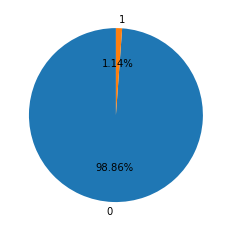

In [27]:
plt.pie( x=data[1], labels=data[0], startangle=90, radius=1, autopct=("%1.2f%%") )
# x:= nuestros datos
# labels:= cuáles son las etiquetas de los datos

plt.show()

## Modificar elementos gráficos

A continuación, se muestra cómo realizar y personalizar un **gráfico de burbujas**

In [35]:
n = 10**6
df = pd.read_csv(r"C:\COVID_pruebas\base_datos_2008.csv", nrows=n)

In [41]:
np.random.seed(0)
df_2 = df.sample(frac=1).head(100)

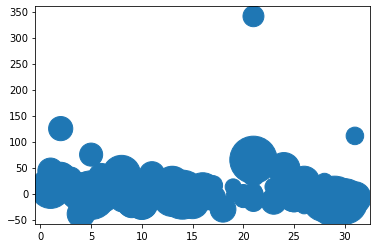

In [46]:
plt.scatter( x = df_2.DayofMonth, y=df_2.ArrDelay, s=df_2.Distance )

Se observa que el gráfico no favorece el entendimiento de los datos. Se agregan más parámetros:

***alpha:*** hace que las burbujas sean traslúcidas. $[0,1]$. Mientras más próximo a cero, menos opaca.

***c:*** agrega un color a las variables de interés, según propongamos. En el ejemplo, los de color amarillo son los días sábado y domingo (6 y 7)

Text(28, 120, 'Mi vuelo')

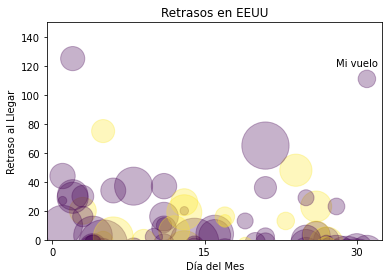

In [67]:
plt.scatter(x = df_2.DayofMonth, y=df_2.ArrDelay, s=df_2.Distance, #s es el área. En este caso, la distancia
           alpha=0.3,
           c = df_2.DayOfWeek.isin([6,7]) #c de color
           )

plt.title( "Retrasos en EEUU" )
plt.xlabel( "Día del Mes" )
plt.ylabel( "Retraso al Llegar" )

plt.ylim( [0,150] ) 
#Esto "recorta" la escala del eje Y.

plt.xticks([0,15,30])
#Esto recorta las escalas de las X. Únicamente aparecen los días 0, 15 y 30

plt.text(x=28, y=120, s="Mi vuelo")
#Se le dan las coordenadas para que escriba un texto.

## Etiquetas y Leyendas

A continuación, se presentan algunas herramientas más avanzadas para personalizar los gráficos.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n = 10**5
df = pd.read_csv(r"C:\COVID_pruebas\base_datos_2008.csv", nrows=n)

In [75]:
data = np.unique(df.DayOfWeek, return_counts=True)
#Esto me arroja cuántos vuelos se han realizado por cada día de la semana.

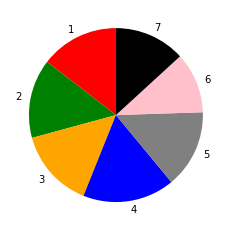

In [85]:
colores = ["Red","Green","Orange","Blue","Gray","Pink","Black"]

plt.pie(x=data[1], labels=data[0], radius=1, 
       colors = colores, 
       startangle=90,
       )
plt.show()

***Comentario:*** La gráfica no favorece el entendimiento de lo que ocurre. Es posible agregar una etiqueta para cada ***'rebanada del pastel'***. Además, es posible elegir una paleta de colores ya predeterminada en la paquetería: ***seaborn***.

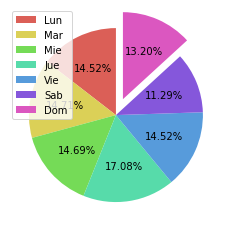

In [109]:
labs = ["Lun","Mar","Mie","Jue","Vie","Sab","Dom"]

plt.pie(x=data[1], #labels=labs, 
       radius=1, 
       colors = sns.color_palette("hls",7), #Se le indica cuál paleta se requiere y cuántos colores
       startangle=90,
       autopct=("%1.2f%%"), #Agrega los decimales
       explode = (0,0,0,0,0,0,.2), #Esto extrae el día 7 (Domingo)
       labeldistance = 1.1
       )

plt.legend(loc="best", labels = labs)
#Esto me coloca la clave de cada color, aunque lo encima, pero se puede escoger la ubicación
plt.show()

[Text(0.5, 0, 'Día de la Semana'), Text(0, 0.5, 'Número de Vuelos')]

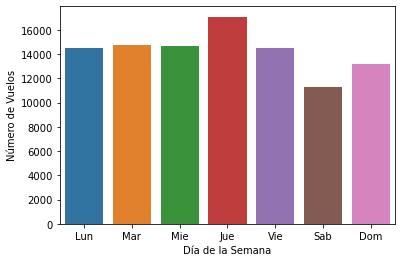

In [112]:
figura = sns.barplot( x=labs, y=data[1] )
figura.set( xlabel="Día de la Semana", ylabel="Número de Vuelos" )

## Gráficos para series temporales en Matplotlib

A continuación, se muestran algunos ejemplos para constuir gráficos para series temporales.

In [114]:
import datetime as dt
import time as tm
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv(r"C:\COVID_pruebas\base_datos_2008.csv")

In [119]:
df_2 = df[ df.Origin.isin(["ATL","HOU","IND"]) ]

df_3 = df.head(500000)

In [132]:
times = []

for i in np.arange( len(df_3) ):
    times.append( dt.datetime( year=2008, month=df_3.loc[i,"Month"], day= df_3.loc[i,"DayofMonth"] ))
#En esta lista, para cada elemento, se guarda el año, el mes y el día del mes.

In [138]:
times[50000]
# Adicionalmente, se tiene espacio para la hora y los minutos

datetime.datetime(2008, 1, 18, 0, 0)

In [148]:
df_3["Time"] = times
df_3.head()

C:\Users\ricar\AppData\Local\Temp/ipykernel_8872/3832150656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3["Time"] = times


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Time
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,2008-01-03


In [151]:
data = df.groupby(by=["Time"], as_index=False)["DepDelay","ArrDelay"].mean()
data.head()

#Se coloca index False pues es una columna
# Los agrupa por fecha
# Calcula el promedio de los tiempos de retraso a la salida y tiempos de retraso a la llegada

KeyError: 'Time'

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


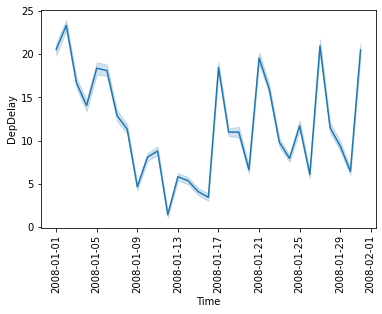

In [161]:
import matplotlib.pyplot as plt
# sns.lineplot( data["Time"],data["DepDelay"] )
a = df_3["Time"]
b = df_3["DepDelay"]

figura = sns.lineplot( a,b )
plt.setp(figura.get_xticklabels(),rotation=90)
plt.show()

In [164]:
data_2 = df.groupby(by=["Time"])["DepDelay","ArrDelay"].mean()
data_2.head()

#Se coloca index False pues es una columna
# Los agrupa por fecha
# Calcula el promedio de los tiempos de retraso a la salida y tiempos de retraso a la llegada

KeyError: 'Time'

In [163]:
sns.lineplot(data=data_2)

NameError: name 'data_2' is not defined

In [165]:
times = []

for i in df_2.index:
    times.append( dt.datetime( year=2008, month=df_2.loc[i,"Month"], day= df_2.loc[i,"DayofMonth"] ))
#En esta lista, para cada elemento, se guarda el año, el mes y el día del mes.

df_2["Time"]=times

C:\Users\ricar\AppData\Local\Temp/ipykernel_8872/3768491867.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["Time"]=times


<AxesSubplot:xlabel='Time', ylabel='ArrDelay'>

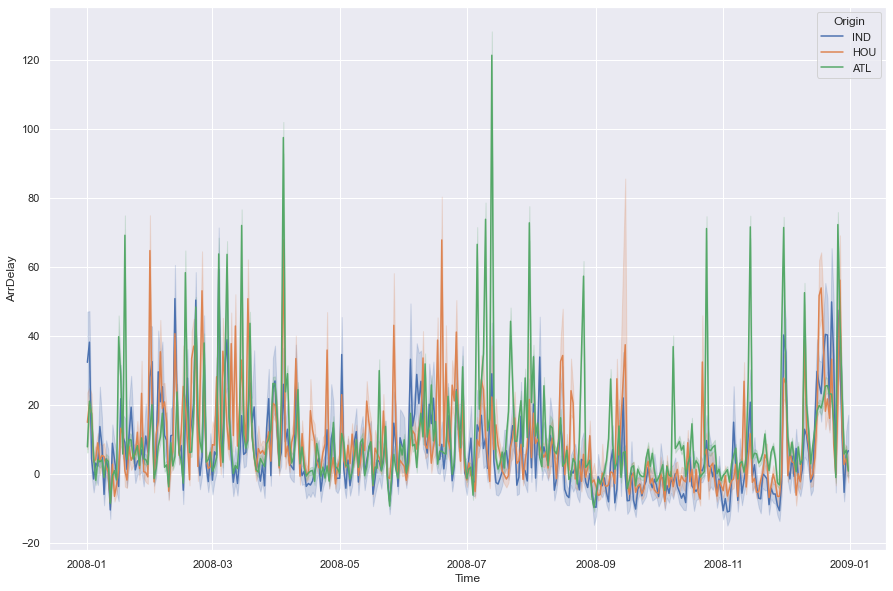

In [166]:
sns.set( rc={'figure.figsize': (15,10)})
sns.lineplot( x="Time", y="ArrDelay", hue="Origin", data=df_2 )

#rc:= permite ajustar los márgenes del gráfico
#hue:= filtra y genera más de una serie a la vez con un dato categórico: Origin